In [1]:
import pandas as pd
import sqlite3 as sql
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#pip install seaborn

In [3]:
Endereco = Path.cwd()

BD = Endereco / 'projeto.db'

print("Conectando no banco de dados...")
ConexaoBD = sql.connect(BD)

print("Lendo os dados da Tabela")
indicadores = pd.read_sql('SELECT * FROM indicadores_ibge_municipios', ConexaoBD)

print("Foram recuperados", indicadores.shape[0], "linhas e", indicadores.shape[1], "colunas")

Conectando no banco de dados...
Lendo os dados da Tabela
Foram recuperados 29 linhas e 94 colunas


In [4]:
indicadores.indicador

0                             População estimada [2021]
1                      População no último censo [2010]
2                          Densidade demográfica [2010]
3     Salário médio mensal dos trabalhadores formais...
4                                Pessoal ocupado [2020]
5                              População ocupada [2020]
6     Percentual da população com rendimento nominal...
7     Taxa de escolarização de 6 a 14 anos de idade ...
8     IDEB – Anos iniciais do ensino fundamental (Re...
9     IDEB – Anos finais do ensino fundamental (Rede...
10              Matrículas no ensino fundamental [2021]
11                    Matrículas no ensino médio [2021]
12                Docentes no ensino fundamental [2021]
13                      Docentes no ensino médio [2021]
14    Número de estabelecimentos de ensino fundament...
15    Número de estabelecimentos de ensino médio [2021]
16                                PIB per capita [2019]
17    Percentual das receitas oriundas de fontes

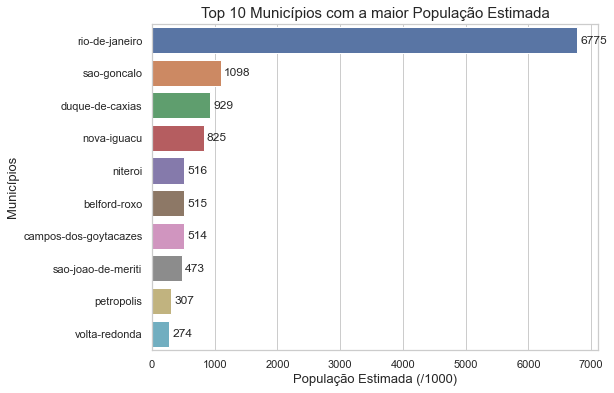

In [87]:
pop_est = indicadores.copy()
pop_est.index = pop_est.indicador
pop_est.drop(columns=['id','indicador'], inplace=True)
pop_est = pop_est.transpose()[['População estimada [2021]']].sort_values(by='População estimada [2021]',ascending=False).head(10)

y = pop_est.index
x = pop_est['População estimada [2021]'].values/1000

fig, ax = plt.subplots(figsize=(8,6))

sns.set_theme(style="whitegrid")
ax = sns.barplot(x=x, y=y)
plt.ticklabel_format(style='plain', axis='x')
ax.set_xlabel('População Estimada (/1000)',fontsize=13)  
ax.set_ylabel('Municípios',fontsize=13)  
ax.set_title("Top 10 Municípios com a maior População Estimada",fontsize=15)  

for p in ax.patches:
    width = p.get_width()
    ax.text(p.get_width()+50,
            p.get_y()+p.get_height()/2,
            int(width),
            va="center")
plt.show()

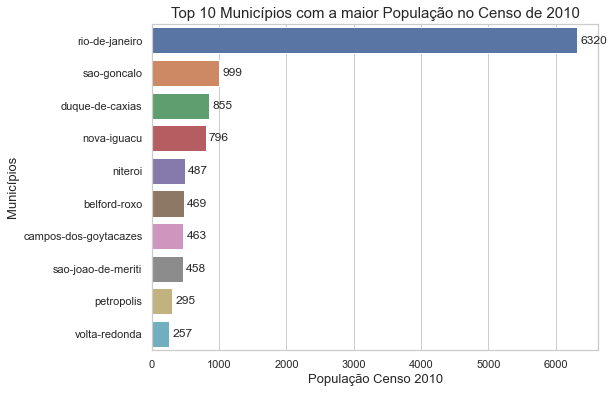

In [92]:
pop_2010 = indicadores.copy()
pop_2010.index = pop_2010.indicador
pop_2010.drop(columns=['id','indicador'], inplace=True)
pop_2010 = pop_2010.transpose()[['População no último censo [2010]']].sort_values(by='População no último censo [2010]',ascending=False).head(10)

y = pop_2010.index
x = pop_2010['População no último censo [2010]'].values/1000

fig, ax = plt.subplots(figsize=(8,6))

sns.set_theme(style="whitegrid")
ax = sns.barplot(x=x, y=y)
plt.ticklabel_format(style='plain', axis='x')
ax.set_xlabel('População Censo 2010',fontsize=13)  
ax.set_ylabel('Municípios',fontsize=13)  
ax.set_title("Top 10 Municípios com a maior População no Censo de 2010",fontsize=15)  

for p in ax.patches:
    width = p.get_width()
    ax.text(p.get_width()+50,
            p.get_y()+p.get_height()/2,
            int(width),
            va="center")
plt.show()

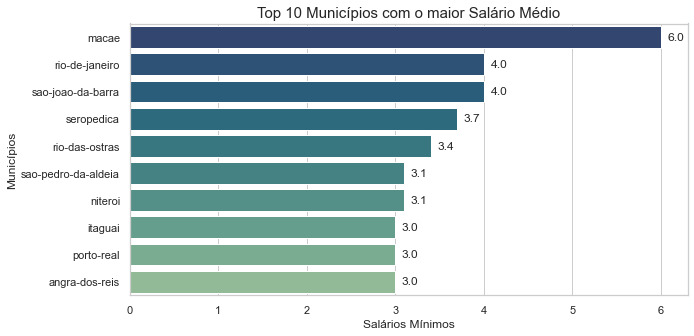

In [88]:
sal_med = indicadores.copy()
sal_med.index = sal_med.indicador
sal_med.drop(columns=['id','indicador'], inplace=True)
sal_med = sal_med.transpose()[['Salário médio mensal dos trabalhadores formais [2020]']].sort_values(by='Salário médio mensal dos trabalhadores formais [2020]',ascending=False).head(10)

y = sal_med.index
x = sal_med['Salário médio mensal dos trabalhadores formais [2020]'].values

fig, ax = plt.subplots(figsize=(10,5))

sns.set_theme(style="whitegrid")
ax = sns.barplot(x=x, y=y ,palette='crest_r')
plt.ticklabel_format(style='plain', axis='x')
ax.set_xlabel('Salários Mínimos',fontsize=12)  
ax.set_ylabel('Municípios',fontsize=12)  
ax.set_title("Top 10 Municípios com o maior Salário Médio",fontsize=15)  

for p in ax.patches:
    width = p.get_width()
    ax.text(p.get_width()+0.075,
           p.get_y()+p.get_height()/2,
           width,
           va="center")
plt.show()

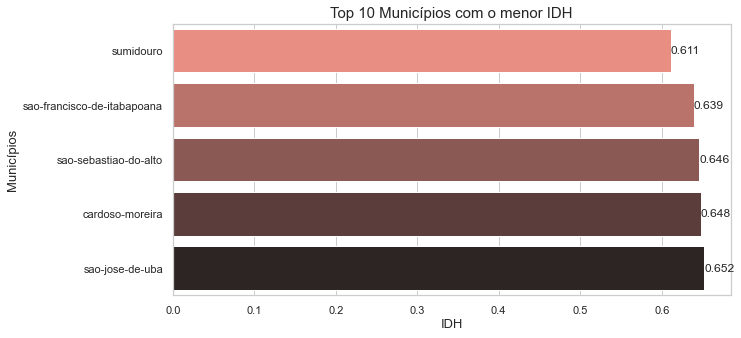

In [89]:
idh = indicadores.copy()
idh.index = idh.indicador
idh.drop(columns=['id','indicador'], inplace=True)
idh = idh.transpose()[['Índice de Desenvolvimento Humano Municipal (IDHM) [2010]']].sort_values(by='Índice de Desenvolvimento Humano Municipal (IDHM) [2010]',ascending=True).head(5)

y = idh.index
x = idh['Índice de Desenvolvimento Humano Municipal (IDHM) [2010]'].values

fig, ax = plt.subplots(figsize=(10,5))

sns.set_theme(style="whitegrid")

ax = sns.barplot(x=x, y=y ,palette='dark:salmon_r')
ax.set_xlabel('IDH',fontsize=13)  
ax.set_ylabel('Municípios',fontsize=13)  
ax.set_title("Top 10 Municípios com o menor IDH",fontsize=15)  

for p in ax.patches:
    width = p.get_width()
    ax.text(p.get_width(),
           p.get_y()+p.get_height()/2,
           width,
           va="center")

plt.show()